# Machine Learning
Author: Jeffreyson Nguyen 862154834

Description: Linear Regression is applied to predict the SPY price of the next 30 days utilizing the last 10 days as testing data. KNN classifier is also used to predict whether the next day SPY would close higher than the previous day.

In [1]:
import requests
import re
import pandas as pd
import numpy as np

senate_df = pd.read_csv("senatedata.csv")
senate_df = senate_df[['transaction_date', 'ticker', 'asset_type', 'type', 'senator']] #select specific dataframe columns for project
senate_df = senate_df.rename(columns={'transaction_date': 'Date'})
senate_df = senate_df.rename(columns={"senator":"Congress Member"})
senate_df = senate_df.set_index('Date')

senate_df = senate_df.dropna(subset=['ticker', 'type', 'Congress Member']) #remove rows containing NaN cells


#filter out asset types that are stock options
remove_asset = senate_df[senate_df['asset_type'] == 'Stock Option'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Municipal Security
remove_asset = senate_df[senate_df['asset_type'] == 'Municipal Security'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Other Securities
remove_asset = senate_df[senate_df['asset_type'] == 'Other Securities'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Corporate Bond
remove_asset = senate_df[senate_df['asset_type'] == 'Corporate Bond'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Non-Public Stock
remove_asset = senate_df[senate_df['asset_type'] == 'Non-Public Stock'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Cryptocurrency
remove_asset = senate_df[senate_df['asset_type'] == 'Cryptocurrency'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are sales full
remove_asset = senate_df[senate_df['type'] == 'Sale (Full)'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are sales partial
remove_asset = senate_df[senate_df['type'] == 'Sale (Partial)'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are exchanges
remove_asset = senate_df[senate_df['type'] == 'Exchange'].index
senate_df.drop(remove_asset, inplace=True)

#Removes N/A data
senate_df = senate_df[~senate_df.ticker.str.contains('N/A')]
senate_df = senate_df[~senate_df.ticker.str.contains('--')]
senate_df = senate_df[~senate_df.type.str.contains('N/A')]
senate_df ['asset_type'].fillna('Stock', inplace=True)

house_df = pd.read_csv("housedata.csv")
house_df = house_df[['transaction_date', 'ticker', 'type', 'representative']] #select specific dataframe columns for project
house_df = house_df.rename(columns={'transaction_date': 'Date'})
house_df = house_df.rename(columns={"representative":"Congress Member"})
house_df = house_df.set_index('Date')

house_df = house_df.dropna(subset=['ticker', 'type']) #remove rows containing NaN cells

house_df = house_df[~house_df.type.str.contains('sale_full')]
house_df = house_df[~house_df.type.str.contains('sale_partial')]
house_df = house_df[~house_df.type.str.contains('exchange')]
house_df['asset_type'] = 'Stock'
house_df['type'] = 'Purchase'
house_df = house_df[['ticker', 'asset_type', 'type', 'Congress Member']]

#Removes N/A data
house_df = house_df[~house_df.ticker.str.contains('N/A')]
house_df = house_df[~house_df.ticker.str.contains('--')]
house_df = house_df[~house_df.type.str.contains('N/A')]

house_df.index = pd.to_datetime(house_df.index).strftime('%m/%d/%Y')

spy_df = pd.read_csv("spydata.csv")
spy_df = spy_df[['Date', 'Close/Last']]
spy_df = spy_df.rename(columns={"Close/Last":"SPY Price"})
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df = spy_df.set_index('Date')

final_df = senate_df.append(house_df)
final_df.index = pd.to_datetime(final_df.index)
final_df = final_df.sort_index()


final_df = final_df.join(spy_df, how='outer')
final_df = final_df.dropna(subset=['ticker', 'asset_type', 'type', 'Congress Member', 'SPY Price']) #remove rows containing NaN cells

spy1week = []
spy2week = []
spy1month = []
spy3month= []

for i in final_df.itertuples():
    try:
        date = getattr(i, 'Index')
        loc = spy_df.index.get_loc(getattr(i, 'Index'))
        
        spy_one_week = spy_df.index[loc + 5]
        spy_two_week = spy_df.index[loc + 10]
        spy_one_month = spy_df.index[loc + 20]
        spy_three_month = spy_df.index[loc + 60]
        
        x1 = spy_df.loc[spy_one_week][0]
        x2 = spy_df.loc[spy_two_week][0]
        x3 = spy_df.loc[spy_one_month][0]
        x4 = spy_df.loc[spy_three_month][0]
        
        spy1week.append(x1)
        spy2week.append(x2)
        spy1month.append(x3)
        spy3month.append(x4)

        
    except Exception:
        spy1week.append("N/A")
        spy2week.append("N/A")
        spy1month.append("N/A")
        spy3month.append("N/A")
        pass
    
    
spy_one_week_df = pd.DataFrame({'SPY 1 WEEK PRICE':spy1week})
spy_two_week_df = pd.DataFrame({'SPY 2 WEEK PRICE':spy2week})
spy_one_month_df = pd.DataFrame({'SPY 1 MONTH PRICE':spy1month})
spy_three_month_df = pd.DataFrame({'SPY 3 MONTH PRICE':spy3month})

dates = []

for i, j in final_df.iterrows():
    dates.append(i)
    
spy_one_week_df['Date'] = dates
spy_one_week_df = spy_one_week_df.set_index('Date')

spy_two_week_df['Date'] = dates
spy_two_week_df = spy_two_week_df.set_index('Date')

spy_one_month_df['Date'] = dates
spy_one_month_df = spy_one_month_df.set_index('Date')

spy_three_month_df['Date'] = dates
spy_three_month_df = spy_three_month_df.set_index('Date')

final_df['SPY 1 WEEK PRICE'] = spy_one_week_df
final_df['SPY 2 WEEK PRICE'] = spy_two_week_df
final_df['SPY 1 MONTH PRICE'] = spy_one_month_df
final_df['SPY 3 MONTH PRICE'] = spy_three_month_df

import yfinance as yf
from yahoofinancials import YahooFinancials


#code to store ticker closing price 1 week, 2week, 1 month, and 3 month from purchase date
price = []
price1week = []
price2week = []
price1month = []
price3month = []

og_df = pd.read_csv("og_price.csv")
one_week_df = pd.read_csv("one_week.csv")
two_week_df = pd.read_csv("two_week.csv")
one_month_df = pd.read_csv("one_month.csv")
three_month_df = pd.read_csv("three_month.csv")


one_week_df = one_week_df.rename(columns={'Price': '1 WEEK PRICE'})
two_week_df = two_week_df.rename(columns={'Price': '2 WEEK PRICE'})
one_month_df = one_month_df.rename(columns={'Price': '1 MONTH PRICE'})
three_month_df = three_month_df.rename(columns={'Price': '3 MONTH PRICE'})

dates = []

for i, j in final_df.iterrows():
    dates.append(i)

og_df['Date'] = dates
og_df = og_df.set_index('Date')
one_week_df['Date'] = dates
one_week_df = one_week_df.set_index('Date')
two_week_df['Date'] = dates
two_week_df = two_week_df.set_index('Date')
one_month_df['Date'] = dates
one_month_df = one_month_df.set_index('Date')
three_month_df['Date'] = dates
three_month_df = three_month_df.set_index('Date')

final_df['Purchase Price'] = og_df
final_df['1 WEEK PRICE'] = one_week_df
final_df['2 WEEK PRICE'] = two_week_df
final_df['1 MONTH PRICE'] = one_month_df
final_df['3 MONTH PRICE'] = three_month_df

final_df = final_df.dropna()

spy_1_week_gains = []
spy_2_week_gains = []
spy_1_month_gains = []
spy_3_month_gains = []

ticker_1_week_gains = []
ticker_2_week_gains = []
ticker_1_month_gains = []
ticker_3_month_gains = []

dates = []
for i, j in final_df.iterrows():
    dates.append(i)

for i, j in final_df.iterrows():
    spy_og_price = j['SPY Price']
    spy_1_week_sold = j['SPY 1 WEEK PRICE']
    spy_1_week_gain = (((spy_1_week_sold - spy_og_price) / spy_og_price) * 100)
    spy_1_week_gains.append(spy_1_week_gain)
    
    spy_2_week_sold = j['SPY 2 WEEK PRICE']
    spy_2_week_gain = (((spy_2_week_sold - spy_og_price) / spy_og_price) * 100)
    spy_2_week_gains.append(spy_2_week_gain)
    
    spy_1_month_sold = j['SPY 1 MONTH PRICE']
    spy_1_month_gain = (((spy_1_month_sold - spy_og_price) / spy_og_price) * 100)
    spy_1_month_gains.append(spy_1_month_gain)
    
    spy_3_month_sold = j['SPY 3 MONTH PRICE']
    spy_3_month_gain = (((spy_3_month_sold - spy_og_price) / spy_og_price) * 100)
    spy_3_month_gains.append(spy_3_month_gain)
    
    ticker_og_price = j['Purchase Price']
    ticker_1_week_sold = j['1 WEEK PRICE']
    ticker_1_week_gain = (((ticker_1_week_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_1_week_gains.append(ticker_1_week_gain)
    
    ticker_2_week_sold = j['2 WEEK PRICE']
    ticker_2_week_gain = (((ticker_2_week_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_2_week_gains.append(ticker_2_week_gain)
    
    ticker_1_month_sold = j['1 MONTH PRICE']
    ticker_1_month_gain = (((ticker_1_month_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_1_month_gains.append(ticker_1_month_gain)
    
    ticker_3_month_sold = j['3 MONTH PRICE']
    ticker_3_month_gain = (((ticker_3_month_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_3_month_gains.append(ticker_3_month_gain)
    
spy_1_week_gains_df = pd.DataFrame(spy_1_week_gains, columns=['SPY 1 WEEK %'])
spy_2_week_gains_df = pd.DataFrame(spy_2_week_gains, columns=['SPY 2 WEEK %'])
spy_1_month_gains_df = pd.DataFrame(spy_1_month_gains, columns=['SPY 1 MONTH %'])
spy_3_month_gains_df = pd.DataFrame(spy_3_month_gains, columns=['SPY 3 MONTH %'])

ticker_1_week_gains_df = pd.DataFrame(ticker_1_week_gains, columns=['TICKER 1 WEEK %'])
ticker_2_week_gains_df = pd.DataFrame(ticker_2_week_gains, columns=['TICKER 2 WEEK %'])
ticker_1_month_gains_df = pd.DataFrame(ticker_1_month_gains, columns=['TICKER 1 MONTH %'])
ticker_3_month_gains_df = pd.DataFrame(ticker_3_month_gains, columns=['TICKER 3 MONTH %'])


spy_1_week_gains_df['Date'] = dates
spy_1_week_gains_df = spy_1_week_gains_df.set_index('Date')
spy_2_week_gains_df['Date'] = dates
spy_2_week_gains_df = spy_2_week_gains_df.set_index('Date')
spy_1_month_gains_df['Date'] = dates
spy_1_month_gains_df = spy_1_month_gains_df.set_index('Date')
spy_3_month_gains_df['Date'] = dates
spy_3_month_gains_df = spy_3_month_gains_df.set_index('Date')

ticker_1_week_gains_df['Date'] = dates
ticker_1_week_gains_df = ticker_1_week_gains_df.set_index('Date')
ticker_2_week_gains_df['Date'] = dates
ticker_2_week_gains_df = ticker_2_week_gains_df.set_index('Date')
ticker_1_month_gains_df['Date'] = dates
ticker_1_month_gains_df = ticker_1_month_gains_df.set_index('Date')
ticker_3_month_gains_df['Date'] = dates
ticker_3_month_gains_df = ticker_3_month_gains_df.set_index('Date')

final_df['SPY 1 WEEK %'] = spy_1_week_gains_df
final_df['SPY 2 WEEK %'] = spy_2_week_gains_df
final_df['SPY 1 MONTH %'] = spy_1_month_gains_df
final_df['SPY 3 MONTH %'] = spy_3_month_gains_df

final_df['TICKER 1 WEEK %'] = ticker_1_week_gains_df
final_df['TICKER 2 WEEK %'] = ticker_2_week_gains_df
final_df['TICKER 1 MONTH %'] = ticker_1_month_gains_df
final_df['TICKER 3 MONTH %'] = ticker_3_month_gains_df

In [2]:
final_df

,ticker,asset_type,type,Congress Member,SPY Price,SPY 1 WEEK PRICE,SPY 2 WEEK PRICE,SPY 1 MONTH PRICE,SPY 3 MONTH PRICE,Purchase Price,...,1 MONTH PRICE,3 MONTH PRICE,SPY 1 WEEK %,SPY 2 WEEK %,SPY 1 MONTH %,SPY 3 MONTH %,TICKER 1 WEEK %,TICKER 2 WEEK %,TICKER 1 MONTH %,TICKER 3 MONTH %
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-13,DD,Stock,Purchase,Thomas R Carper,146.59,143.770,141.510,140.950,135.70,34.467983,...,31.283749,34.421001,-1.923733,-3.465448,-3.847466,-7.428883,-1.749961,-6.247129,-9.238239,-0.136306
2012-12-17,DD,Stock,Purchase,Thomas R Carper,143.77,142.473,141.450,136.370,146.70,35.274593,...,37.686222,37.854164,-0.902135,-1.613689,-5.147110,2.037977,2.139186,4.900604,6.836730,7.312829
2013-03-15,DD,Stock,Purchase,Thomas R Carper,155.83,155.440,152.110,152.290,143.77,37.854164,...,34.128189,38.447910,-0.250273,-2.387217,-2.271706,-7.739203,-3.046444,-6.288086,-9.842973,1.568510
2013-04-29,CG,Stock,Purchase,John Hoeven,159.30,156.170,155.118,156.050,149.70,18.120909,...,17.672190,16.524195,-1.964846,-2.625235,-2.040176,-6.026365,1.718622,-6.651839,-2.476250,-8.811446
2013-06-13,DD,Stock,Purchase,Thomas R Carper,164.21,162.730,165.830,166.115,154.61,39.182953,...,38.967293,44.323570,-0.901285,0.986542,1.160100,-5.846173,-4.213579,-5.709406,-0.550393,13.119525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-21,AMZN,Stock,Purchase,Hon. Nancy Pelosi,414.94,416.580,422.120,416.740,382.33,3203.080078,...,3453.959961,3241.959961,0.395238,1.730371,0.433798,-7.858968,0.624086,-0.158287,7.832457,1.213828
2021-05-21,AAPL,Stock,Purchase,Hon. Nancy Pelosi,414.94,416.580,422.120,416.740,382.33,125.430000,...,132.300003,150.190002,0.395238,1.730371,0.433798,-7.858968,-0.653751,0.374712,5.477161,19.740096
2021-05-24,BABA,Stock,Purchase,Hon. Pete Sessions,419.17,415.520,417.940,417.610,380.36,210.440002,...,211.320007,172.350006,-0.870768,-0.293437,-0.372164,-9.258773,4.295758,2.556550,0.418174,-18.100169


## Collected and Clean SPY Next 10 Day Prices

In [3]:
new_spy_df = spy_df
new_spy_df = pd.concat([new_spy_df, new_spy_df.shift(), new_spy_df.shift(1), new_spy_df.shift(2), new_spy_df.shift(3), new_spy_df.shift(4),
                               new_spy_df.shift(5), new_spy_df.shift(6), new_spy_df.shift(7), new_spy_df.shift(8), new_spy_df.shift(9)], axis=1).dropna()

new_spy_df.columns=list(range(0,11))
new_spy_df = new_spy_df.rename(columns={0:'Price'})
new_spy_df

,Price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2021-07-28,438.83,440.65,440.65,438.51,437.59,441.15,438.98,441.76,442.49,442.13,442.68
2021-07-27,439.01,438.83,438.83,440.65,438.51,437.59,441.15,438.98,441.76,442.49,442.13
2021-07-26,441.02,439.01,439.01,438.83,440.65,438.51,437.59,441.15,438.98,441.76,442.49
2021-07-23,439.94,441.02,441.02,439.01,438.83,440.65,438.51,437.59,441.15,438.98,441.76
2021-07-22,435.46,439.94,439.94,441.02,439.01,438.83,440.65,438.51,437.59,441.15,438.98
...,...,...,...,...,...,...,...,...,...,...,...
2011-08-17,119.67,114.51,114.51,112.64,112.73,116.44,118.08,116.28,117.97,121.36,121.68
2011-08-16,119.59,119.67,119.67,114.51,112.64,112.73,116.44,118.08,116.28,117.97,121.36
2011-08-15,120.62,119.59,119.59,119.67,114.51,112.64,112.73,116.44,118.08,116.28,117.97


Each column represents the days of SPY Price.

## Applying Linear Regression to Predict SPY Next 30 Days Price

<AxesSubplot:title={'center':'Linear Regression Prediction of SPY Price 30 Days'}, xlabel='Date', ylabel='Price'>

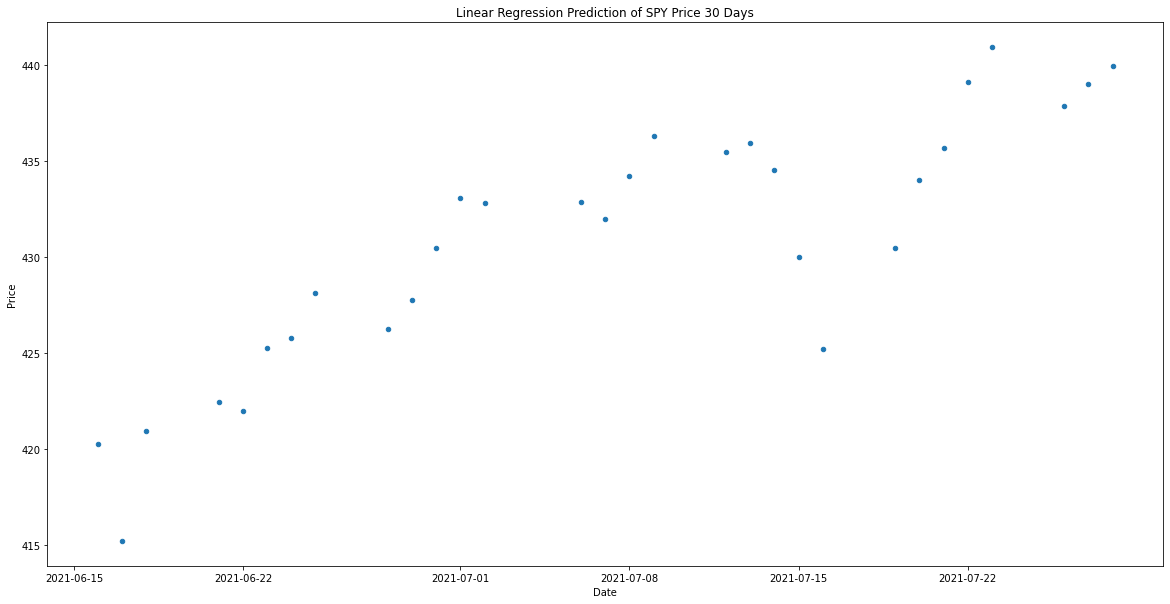

In [4]:
from sklearn.linear_model import LinearRegression


new_spy_df = new_spy_df.reset_index()
new_spy_df = new_spy_df.sort_values(by=['Date'])

training_data = new_spy_df.head(len(new_spy_df) - 10) #gets 10 days worth of data before initial data to predict next day price
testing_data = new_spy_df.tail(30) #most recent 30 days to test prediction results

X_train = training_data[list(range(1, 11))]
X_test = testing_data[list(range(1, 11))]
y_train = training_data["Price"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

testing_data = testing_data.set_index('Date')

testing_data['Results'] = model.predict(X=X_test)

testing_data = testing_data.reset_index()

testing_data.plot(kind="scatter", x="Date", y="Results", title="Linear Regression Prediction of SPY Price 30 Days", ylabel="Price", figsize=(20,10))

In [5]:
print(model.predict(X=X_test))

[420.22531568 415.19158599 420.91065244 422.43158893 421.98476699
 425.24398449 425.78212046 428.13845884 426.23236142 427.73790275
 430.48981536 433.04909438 432.83528609 432.86528644 431.98204197
 434.21492691 436.28735291 435.48867408 435.92680931 434.50885619
 430.01309583 425.20184759 430.44191745 434.01317066 435.66849627
 439.10214807 440.94325532 437.86472682 439.0300506  439.92779337]


The graph represents the prediction of the next 30 days price of SPY.

## Comparing Linear Regression Prediction vs Actual SPY Price of the next 30 Days

<AxesSubplot:title={'center':'Linear Regression Prediction vs Testing SPY 30 Day Price'}, xlabel='Date', ylabel='Price'>

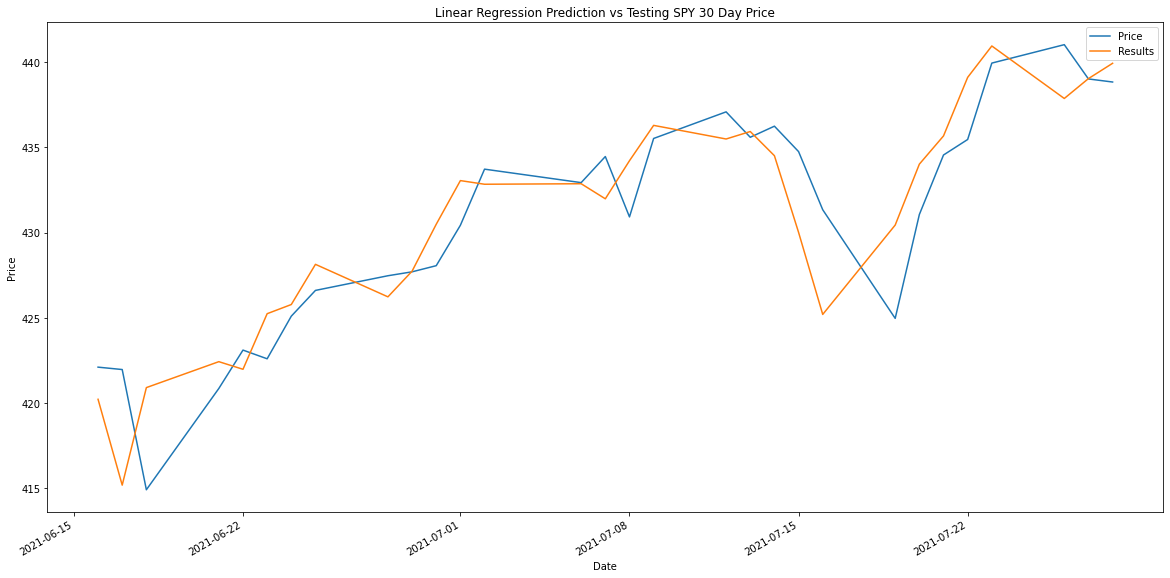

In [6]:
testing_data = testing_data.set_index('Date')
testing_data[['Price', 'Results']].plot(title="Linear Regression Prediction vs Testing SPY 30 Day Price", ylabel="Price", figsize=(20,10))

The graph shows that the prediction is fairly accurate, following a similiar pattern. However the price predicted aren't exact compared to the actual prices, but it is very close, following the same pattern as shown on the graph.

## Appying KNN Classifier to predict whether the next day SPY closes Higher than the previous day

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_spy_df = pd.read_csv("spydata.csv")
knn_spy_df = knn_spy_df.rename(columns={"Close/Last":"SPY Price"})
knn_spy_df.Date = pd.to_datetime(knn_spy_df.Date)
knn_spy_df = knn_spy_df.sort_values(by=['Date'])

## Cleaned data and added features and class labels

In [8]:
#store last 30 days actual value for testing later and removes the actual 30 days from dataset
X_testing = knn_spy_df.tail(30)
knn_spy_df = knn_spy_df.iloc[:-30]

knn_spy_df['High_Low_Diff'] = knn_spy_df['High'] - knn_spy_df['Low']
del knn_spy_df['Open']
del knn_spy_df['High']
del knn_spy_df['Low']
knn_spy_df['class'] = np.where(knn_spy_df['SPY Price'].shift(-1) > knn_spy_df['SPY Price'], 1, 0)

X_testing['High_Low_Diff'] = X_testing['High'] - X_testing['Low']
del X_testing['Open']
del X_testing['High']
del X_testing['Low']
X_testing['class'] = np.where(X_testing['SPY Price'].shift(-1) > X_testing['SPY Price'], 1, 0)

print(knn_spy_df)

           Date  SPY Price     Volume  High_Low_Diff  class
2515 2011-08-11     117.33  486869900         6.6030      1
2514 2011-08-12     118.12  313505600         1.9350      1
2513 2011-08-15     120.62  258268200         1.7400      0
2512 2011-08-16     119.59  293365600         2.3800      1
2511 2011-08-17     119.67  237695100         2.4800      0
...         ...        ...        ...            ...    ...
34   2021-06-22     423.11   57700300         3.9200      0
33   2021-06-23     422.60   49445410         1.5400      1
32   2021-06-24     425.10   45110290         0.9300      1
31   2021-06-25     426.61   58129530         1.5443      1
30   2021-06-28     427.47   53159580         1.7600      0

[2486 rows x 5 columns]


Features added was High_Low_Diff, which is the daily high and low difference of SPY.

Features also included a classification label called class, which is label as 0 and 1. 0 meaning false, 1 meaning true. It searches if the SPY closed higher than the previous day.

Utilizing the volume, high_low_diff features, along with KNN classifier, it should predict whether SPY will close higher or not than the previous day.

Volume was used as a feature because volume indicates whether SPY was traded alot or not. With higher volume means more trading activity is happening, and lower means none. It could help determine the price of SPY.

## KNN Classifier Training and Testing With K=5

In [9]:
from sklearn.metrics import accuracy_score

X_train = knn_spy_df[["Volume", "High_Low_Diff"]]
y_train = knn_spy_df["class"]

results = []

for i, j in X_testing.iterrows():

    x_new = pd.Series(dtype='float64')
    x_new["Volume"] = j['Volume']
    x_new["High_Low_Diff"] = j['High_Low_Diff']
    
    scaler = StandardScaler()
    X_train_st = scaler.fit_transform(X_train)
    X_new_st = scaler.transform(pd.DataFrame([x_new]))

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X=X_train_st, y=y_train)
    results.append(int(str(model.predict(X=X_new_st))[1:-1]))#removes brackets
    
X_testing['predicted'] = results

y_test = X_testing['class']
y_pred = X_testing['predicted']

print(X_testing)

         Date  SPY Price     Volume  High_Low_Diff  class  predicted
29 2021-06-29     427.70   35970520         1.4300      1          1
28 2021-06-30     428.06   64827860         1.6000      1          0
27 2021-07-01     430.43   53441030         1.8000      1          0
26 2021-07-02     433.72   57697670         3.5782      0          1
25 2021-07-06     432.93   68710420         4.0000      1          1
24 2021-07-07     434.46   63549460         3.2500      0          1
23 2021-07-08     430.92   97595230         4.2100      1          0
22 2021-07-09     435.52   76238580         5.1260      1          0
21 2021-07-12     437.08   52889590         2.3800      0          1
20 2021-07-13     435.59   52911310         2.5300      1          1
19 2021-07-14     436.24   64130350         3.0100      0          1
18 2021-07-15     434.75   55126360         2.8100      0          0
17 2021-07-16     431.34   75874660         5.1400      0          0
16 2021-07-19     424.97  14798700

Testing dataset used the most recent 30 days of SPY to backtest the prediction. The results was then added to the dataframe listed as 'predicted', next to the actual results 'class'.

<AxesSubplot:title={'center':'Prediction vs Actual KNN 30 Days K=5'}, xlabel='Date', ylabel='Class'>

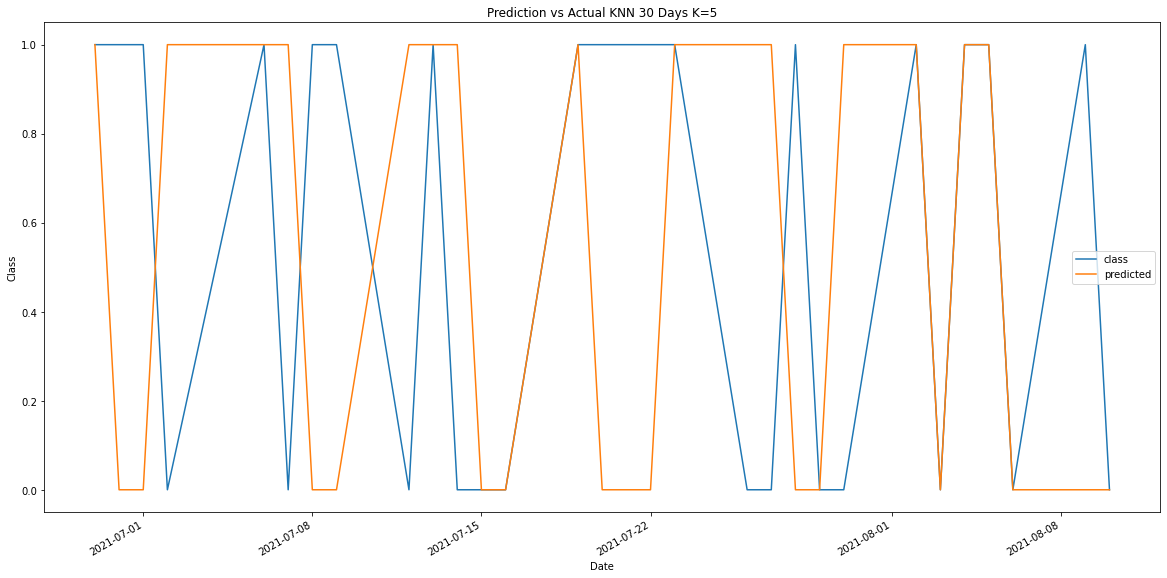

In [10]:
X_testing = X_testing.set_index('Date')
X_testing[['class', 'predicted']].plot(kind="line", figsize=(20, 10), ylabel="Class", title="Prediction vs Actual KNN 30 Days K=5")

The graph above shows the predicted vs actual classifier over 30 days with K=5.

In [11]:
print(accuracy_score(y_test, y_pred))

0.4666666666666667


The performance of KNN classifier with K=5 is 46.6%. The performance is fairly low, not meeting atleast 50%+. Thus, I tried K=15 next.

## KNN Classifier Training and Testing With K=15

In [12]:
X_testing = X_testing.reset_index()

results1 = []

for i, j in X_testing.iterrows():

    x_new = pd.Series(dtype='float64')
    x_new["Volume"] = j['Volume']
    x_new["High_Low_Diff"] = j['High_Low_Diff']
    
    scaler = StandardScaler()
    X_train_st = scaler.fit_transform(X_train)
    X_new_st = scaler.transform(pd.DataFrame([x_new]))

    model = KNeighborsClassifier(n_neighbors=15)
    model.fit(X=X_train_st, y=y_train)
    results1.append(int(str(model.predict(X=X_new_st))[1:-1]))#removes brackets
    
X_testing['predicted'] = results1

y_test = X_testing['class']
y_pred = X_testing['predicted']

print(X_testing)

         Date  SPY Price     Volume  High_Low_Diff  class  predicted
0  2021-06-29     427.70   35970520         1.4300      1          1
1  2021-06-30     428.06   64827860         1.6000      1          0
2  2021-07-01     430.43   53441030         1.8000      1          0
3  2021-07-02     433.72   57697670         3.5782      0          1
4  2021-07-06     432.93   68710420         4.0000      1          1
5  2021-07-07     434.46   63549460         3.2500      0          1
6  2021-07-08     430.92   97595230         4.2100      1          0
7  2021-07-09     435.52   76238580         5.1260      1          1
8  2021-07-12     437.08   52889590         2.3800      0          1
9  2021-07-13     435.59   52911310         2.5300      1          1
10 2021-07-14     436.24   64130350         3.0100      0          1
11 2021-07-15     434.75   55126360         2.8100      0          0
12 2021-07-16     431.34   75874660         5.1400      0          0
13 2021-07-19     424.97  14798700

Testing dataset used the most recent 30 days of SPY to backtest the prediction. The results was then added to the dataframe listed as 'predicted', next to the actual results 'class'.

<AxesSubplot:title={'center':'Prediction vs Actual KNN 30 Days K=15'}, xlabel='Date', ylabel='Class'>

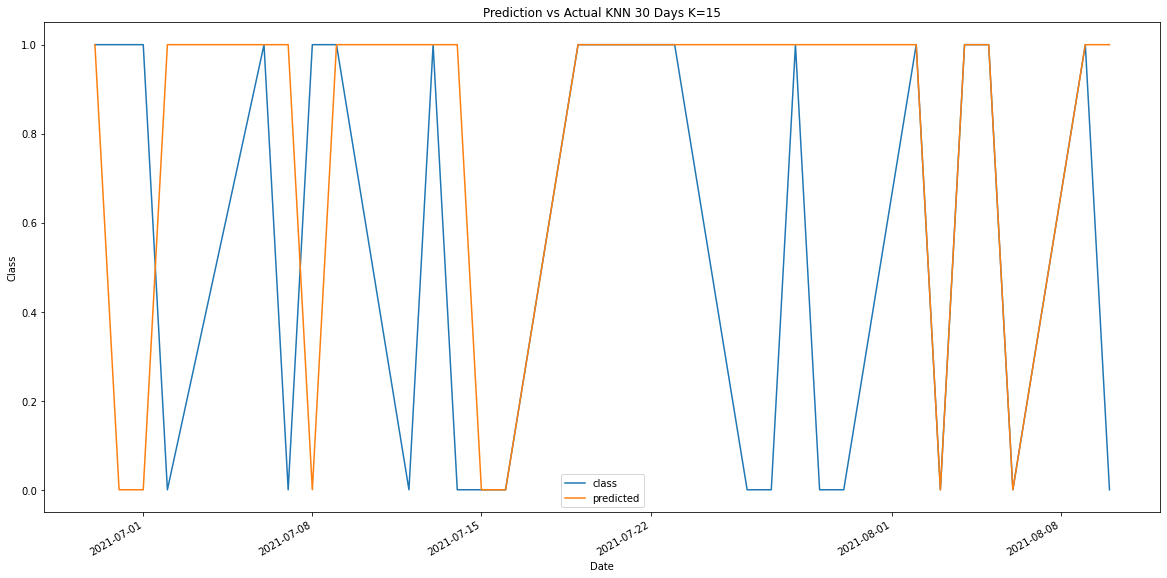

In [13]:
X_testing = X_testing.set_index('Date')
X_testing[['class', 'predicted']].plot(kind="line", figsize=(20, 10), ylabel="Class", title="Prediction vs Actual KNN 30 Days K=15")

The graph above shows the predicted vs actual classifier over 30 days with K=15.

In [14]:
print(accuracy_score(y_test, y_pred))

0.6


The performance of KNN classifier with K=15 is 60%. The performance is exceed expectation of over 50% in prediction results, using volume and SPY high and low difference of the day as features.

K=15 performed better than k=5, with 60% accuracy for k=15 and 46.6% accuracy for k=5, for predicting whether SPY closes higher thant he previous day, using the last most recent 30 days as testing sets. Using K=15 cost performance compared to K=5, but results in higher accuracy.